# The data cleaning process

The first step on implementing the idea we chose was deciding how we would gather the datasets needed, and what cleaning they needed.

As we only had 2 days to realy implement something, doing a more refined dataset search was out of question, so we went for the proven live ones that could be easily cleaned, so that we had a constant stream of reliable new data that could be easily cleaned and preprocessed by a script, being ready to pass trough a pipeline right after harvesting.

[//]: # (bom, reliable não eh algo q u falaria sobre qualquer dado disponibilizado por esse governo, mas eh o melhor q temos de facil acesso, quem não tem cão caça com gato )

the first dataset we choose was the governamental "Painel Coronavírus" from brazilian governament, it can be found on https://covid.saude.gov.br/. The timed version used on this quick notepad is the snapshot of 29-7-2020

the second dataset is an amalgamation of comparative keywords search trends by city provided by the google trends website https://trends.google.com/trends/. Scraping he google ads price check is a better way to get better data on this, but to get acess to it you need a google ads account, and as the datasets have to be publically accessible doing some hacks to have the google trends data be usable was the fastest and more reproducibly way.

### The covid cases dataset:

Let's start with some quick EDA on the governmental dataset:

In [1]:
import math
import pandas as pd
import numpy as np
import os

In [2]:
import pandas as pd

In [3]:
covid_gov_df = pd.read_excel('./dataframes/HIST_PAINEL_COVIDBR_29jul2020.xlsx')

In [4]:
covid_gov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696368 entries, 0 to 696367
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   regiao                  696368 non-null  object        
 1   estado                  696212 non-null  object        
 2   municipio               689375 non-null  object        
 3   coduf                   696368 non-null  int64         
 4   codmun                  692000 non-null  float64       
 5   codRegiaoSaude          689375 non-null  float64       
 6   nomeRegiaoSaude         689375 non-null  object        
 7   data                    696368 non-null  datetime64[ns]
 8   semanaEpi               696368 non-null  int64         
 9   populacaoTCU2019        693743 non-null  object        
 10  casosAcumulado          696368 non-null  int64         
 11  casosNovos              696368 non-null  int64         
 12  obitosAcumulado         696368

In [5]:
covid_gov_df[covid_gov_df.municipio.notnull()]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
4493,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-27,13,22945,0,0,0,0,NaN,NaN,0.0
4494,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-28,13,22945,0,0,0,0,NaN,NaN,0.0
4495,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-29,14,22945,0,0,0,0,NaN,NaN,0.0
4496,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-30,14,22945,0,0,0,0,NaN,NaN,0.0
4497,Norte,RO,Alta Floresta D'Oeste,11,110001.0,11005.0,ZONA DA MATA,2020-03-31,14,22945,0,0,0,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696363,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-25,30,3015268,94187,1773,1275,31,NaN,NaN,1.0
696364,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-26,31,3015268,96332,2145,1308,33,NaN,NaN,1.0
696365,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-27,31,3015268,98480,2148,1339,31,NaN,NaN,1.0
696366,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-07-28,31,3015268,100726,2246,1391,52,NaN,NaN,1.0


In [6]:
covid_gov_df[covid_gov_df.municipio.notnull()].sample(10)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
556191,Sul,SC,Herval d'Oeste,42,420670.0,42008.0,MEIO OESTE,2020-06-08,24,22606,8,0,0,0,NaN,NaN,0.0
205440,Nordeste,PE,Sanharó,26,261240.0,26003.0,CARUARU,2020-06-07,24,26462,26,2,4,0,NaN,NaN,0.0
620094,Sul,RS,Restinga Sêca,43,431550.0,43001.0,REGIAO 01,2020-07-06,28,15789,23,1,1,0,NaN,NaN,0.0
229289,Nordeste,SE,Neópolis,28,280440.0,28007.0,PROPRIA,2020-05-12,20,18719,0,0,0,0,NaN,NaN,0.0
694675,Centro-Oeste,GO,Trindade,52,522140.0,52001.0,CENTRAL,2020-05-23,21,127599,31,-1,1,0,NaN,NaN,1.0
248236,Nordeste,BA,Dário Meira,29,291000.0,29015.0,JEQUIE,2020-07-23,30,10710,251,8,2,0,NaN,NaN,0.0
285974,Sudeste,MG,Açucena,31,310050.0,31037.0,IPATINGA,2020-07-11,28,9470,22,1,1,0,NaN,NaN,0.0
363817,Sudeste,MG,Raposos,31,315390.0,31016.0,BELO HORIZONTE/ NOVA LIMA/ CAETE,2020-06-09,24,16354,8,2,0,0,NaN,NaN,1.0
599391,Sul,RS,Eugênio de Castro,43,430783.0,43011.0,REGIAO 11,2020-04-19,17,2396,0,0,0,0,NaN,NaN,0.0
338210,Sudeste,MG,Juvenília,31,313695.0,31076.0,MANGA,2020-06-27,26,5724,0,0,0,0,NaN,NaN,0.0


In [7]:
covid_gov_df.municipio.value_counts()

Bom Jesus           625
São Domingos        500
Vera Cruz           500
Santa Terezinha     500
Bonito              500
                   ... 
Descoberto          125
Massapê do Piauí    125
Itatiba             125
Icaraí de Minas     125
Penha               125
Name: municipio, Length: 5246, dtype: int64

Looks good, it has the covid data by date we need, has the name and city code and has even a code delimiter for the governmental health programs (codRegiaoSaude)

(the city code will be usefull later when we need to diferentiate same name cities, as there is a lot, every name with more than 125 values on the last cell is a duplicated city name, but it's not something we will need to to on this first 2 day project)

[//]: # (fazer uma descrição em ingles depois do que cada coluna é, pois mesmo que sejam auto-explicativas o nome está em portugues)

### The google trends datasets:

Now this one we need to do some data cleaning.

And some quick hacks, when harvesting this dataset we found some problems that could been solved by using the API, but as I never used it and it was just a proof of concept for the ideia, if it proved itself feasible we could drop some of these hacks and get all the data on the API itself.

So the problems we encountered:

1. Google reduces data granularity the further in time you go.

This is one we already have a solution, but it demands time, the only thing we dont have, so a hack will be used.

[//]: # (and money, and acess to private datasets... but that's life, it gives you lemons, and you suck then dry bcs we dont have water or sugar for a lemonade)

2. See in which location your term was most popular during the specified time frame.
    
    Values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. 
    
    Note: A higher value means a higher proportion of all queries, not a higher absolute query count. So a tiny country where 80% of the queries are for "bananas" will get twice the score of a giant country where only 40% of the queries are for "bananas".

This is a big one, all the hard numbers on the trends website are relational, they don't give hard numbers, and we dont want our data on a city in relation to another  as we are treating evey city as semi-closed entity


### Harvesting the datasets

lets begin harvesting the datasets:

after deliberating on a quick list of keywords to search we got this one:

* hotel
* supermercado
* bar
* restaurante
* academia
* salão
* cursos
* material de construção
* escritório
* escola
* feira

going to the google trends website and getting a first look on a term of the list we quickly see the first problem, after 1 week, the data is scarce on the low search volume locations, the data by city contains only the big ones.

this is a problem that could be solved by scraping every week for a month to get a big dataset with the needed granurality, but we dont have a month, and even on the short span of this hackathon some of the data gathered on saturday was deleted of the website on the sunday (the day of the week change)

and the second problem can be quickly solved for this 2 day prototype by getting a keyword to be the benchmark, so google gives us a comparative between the keywords on the city, and not the between the cities on the keyword.

The benchmark has to have a search consistent and flat search history, google was the first to be tested as it both the characteristics, but it's high search rate made it a poor benchmark for low searched terms, the second tested and chosen one is 'mercado', as it too has the characteristics needed and has a lower search rate. 

With the datasets organized by week on the gtrends_citites_keywords folder we can now begin forming our trends dataframe

In [8]:
import os

In [9]:
path = './dataframes/gtrends_cities_keywords/'
os.listdir(path)

['08-14', '15-21', '22-28']

we got 3 weeks of data (remember, it's the data scraped at 1/8/2020, if it was scraped at the end of the week it represents it would be much healthier)

but it's what we got for now, lets join the keywords on dataframes delimited by dates and indexed by cities

In [10]:
dfs = {}
for folder in os.listdir(path):
    dfs[folder] = pd.DataFrame()
    for file_name in os.listdir(path + folder):
        with open(path+folder+'/'+file_name) as file:
            file.readline()
            df_keyword = pd.read_csv(file,delimiter=',',index_col=0)
            dfs[folder][file_name.split('.')[0]] = df_keyword.iloc[:,1].str.replace(r'\D', '').astype(float)/df_keyword.iloc[:,0].str.replace(r'\D', '').astype(float)

In [11]:
for i in dfs:
    print(i + ':')
    display(dfs[i])

08-14:


,academia,bar,chocolate,cursos,empregada,escola,escritório,feira,hotel,material de construção,motorista,restaurante,salão,supermercado
City,,,,,,,,,,,,,,
Embu das Artes,0.086957,0.030928,NaN,0.098901,NaN,0.219512,0.020408,0.052632,0.041667,0.063830,NaN,0.123596,NaN,0.123596
Itaquaquecetuba,0.063830,0.030928,0.176471,0.149425,0.020408,0.149425,0.010101,0.052632,0.041667,0.010101,0.030928,0.063830,0.010101,0.086957
Cotia,0.063830,0.052632,0.136364,0.136364,0.010101,0.176471,0.020408,0.075269,0.086957,0.030928,0.020408,0.176471,0.020408,0.052632
Ribeirão das Neves,0.063830,0.041667,0.149425,0.063830,0.020408,0.162791,0.010101,0.052632,0.075269,0.010101,0.041667,0.063830,0.010101,0.123596
Santana de Parnaíba,0.063830,0.041667,NaN,0.136364,NaN,0.136364,NaN,0.041667,0.136364,0.020408,NaN,0.086957,NaN,0.063830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Goiânia,0.123596,0.111111,0.176471,0.190476,0.020408,0.176471,0.041667,0.086957,0.282051,0.041667,0.030928,0.250000,0.020408,0.315789
Recife,0.149425,0.086957,0.190476,0.204819,0.041667,0.333333,0.030928,0.098901,0.351351,0.010101,0.020408,0.204819,0.020408,0.075269
Belém,0.204819,0.123596,0.176471,0.219512,0.063830,0.315789,0.052632,0.098901,0.388889,0.041667,0.030928,0.219512,0.020408,0.111111


15-21:


,academia,bar,chocolate,cursos,empregada,escola,escritório,feira,hotel,material de construção,motorista,restaurante,salão,supermercado
City,,,,,,,,,,,,,,
Rio Grande,0.075269,0.020408,NaN,0.098901,NaN,0.111111,0.020408,0.020408,0.075269,0.030928,NaN,0.020408,0.020408,0.063830
Santa Luzia,0.075269,0.030928,NaN,0.111111,NaN,0.219512,0.030928,0.086957,0.075269,0.030928,NaN,0.086957,NaN,0.123596
Cotia,0.086957,0.063830,NaN,0.063830,NaN,0.219512,0.020408,0.075269,0.111111,0.020408,NaN,0.176471,0.010101,0.075269
Suzano,0.075269,0.030928,0.162791,0.098901,0.020408,0.149425,0.041667,0.111111,0.176471,0.010101,0.020408,0.136364,0.030928,0.052632
Presidente Prudente,0.063830,0.063830,0.149425,0.086957,NaN,0.190476,0.041667,0.086957,0.136364,0.052632,0.020408,0.149425,0.010101,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
São Luís,0.162791,0.149425,0.136364,0.282051,0.030928,0.408451,0.030928,0.075269,0.298701,0.020408,0.020408,0.162791,0.030928,0.086957
João Pessoa,0.136364,0.098901,0.298701,0.234568,0.030928,0.333333,0.052632,0.111111,0.250000,0.052632,0.041667,0.176471,0.052632,0.176471
Belém,0.219512,0.136364,0.176471,0.219512,0.041667,0.333333,0.041667,0.111111,0.515152,0.052632,0.052632,0.204819,0.052632,0.098901


22-28:


,academia,bar,chocolate,cursos,empregada,escola,escritório,feira,hotel,material de construção,motorista,restaurante,salão,supermercado
City,,,,,,,,,,,,,,
Rio Grande,0.063830,0.041667,NaN,0.041667,NaN,0.063830,0.052632,0.030928,0.063830,NaN,NaN,0.030928,0.020408,0.123596
Itaquaquecetuba,0.086957,0.063830,0.149425,0.111111,0.010101,0.136364,0.020408,0.098901,0.041667,0.010101,0.020408,0.075269,0.010101,0.052632
Arujá,0.063830,0.052632,0.176471,0.190476,0.020408,0.190476,0.020408,0.111111,0.086957,0.030928,0.030928,0.086957,0.030928,0.075269
Franca,0.041667,0.063830,0.162791,0.052632,0.010101,0.136364,0.020408,0.176471,0.190476,0.020408,0.030928,0.136364,0.041667,0.190476
Itapevi,0.098901,0.030928,NaN,0.123596,NaN,0.219512,NaN,0.123596,0.136364,0.030928,NaN,0.149425,0.041667,0.162791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
João Pessoa,0.190476,0.136364,0.265823,0.176471,0.075269,0.388889,0.063830,0.136364,0.282051,0.063830,0.075269,0.149425,0.030928,0.219512
Natal,0.250000,0.149425,0.250000,0.265823,0.063830,0.333333,0.075269,0.098901,0.388889,0.075269,0.123596,0.250000,0.063830,0.162791
Belém,0.190476,0.123596,0.162791,0.219512,0.063830,0.298701,0.052632,0.123596,0.428571,0.052632,0.075269,0.204819,0.030928,0.149425


now we can concatenate all on a single dataframe with a multi-index of date and city

In [12]:
df_trends = pd.DataFrame()
for i in dfs:
    aux_df = dfs[i].reset_index()
    aux_df['Date'] = i
    aux_df['_start_day'], aux_df['_end_day'] = i.split('-')
    df_trends = df_trends.append(aux_df, ignore_index=True)

In [13]:
df_trends.set_index(['Date', 'City'], inplace=True)

In [14]:
df_trends

academia       bar  chocolate    cursos  empregada  \
Date  City                                                                      
08-14 Embu das Artes       0.086957  0.030928        NaN  0.098901        NaN   
      Itaquaquecetuba      0.063830  0.030928   0.176471  0.149425   0.020408   
      Cotia                0.063830  0.052632   0.136364  0.136364   0.010101   
      Ribeirão das Neves   0.063830  0.041667   0.149425  0.063830   0.020408   
      Santana de Parnaíba  0.063830  0.041667        NaN  0.136364        NaN   
...                             ...       ...        ...       ...        ...   
22-28 João Pessoa          0.190476  0.136364   0.265823  0.176471   0.075269   
      Natal                0.250000  0.149425   0.250000  0.265823   0.063830   
      Belém                0.190476  0.123596   0.162791  0.219512   0.063830   
      Fortaleza            0.333333  0.136364   0.265823  0.204819   0.030928   
      Manaus               0.282051  0.098901   0.176471  0.428571   0.030928   

                             escola  escritório     feira     hotel  \
Date  City                                                            
08-14 Embu das Artes       0.219512    0.020408  0.052632  0.041667   
      Itaquaquecetuba      0.149425    0.010101  0.052632  0.041667   
      Cotia                0.176471    0.020408  0.075269  0.086957   
      Ribeirão das Neves   0.162791    0.010101  0.052632  0.075269   
      Santana de Parnaíba  0.136364         NaN  0.041667  0.136364   
...                             ...         ...       ...       ...   
22-28 João Pessoa          0.388889    0.063830  0.136364  0.282051   
      Natal                0.333333    0.075269  0.098901  0.388889   
      Belém                0.298701    0.052632  0.123596  0.428571   
      Fortaleza            0.408451    0.063830  0.162791  0.388889   
      Manaus               0.515152    0.063830  0.176471  0.408451   

                           material de construção  motorista  restaurante  \
Date  City                                                                  
08-14 Embu das Artes                     0.063830        NaN     0.123596   
      Itaquaquecetuba                    0.010101   0.030928     0.063830   
      Cotia                              0.030928   0.020408     0.176471   
      Ribeirão das Neves                 0.010101   0.041667     0.063830   
      Santana de Parnaíba                0.020408        NaN     0.086957   
...                                           ...        ...          ...   
22-28 João Pessoa                        0.063830   0.075269     0.149425   
      Natal                              0.075269   0.123596     0.250000   
      Belém                              0.052632   0.075269     0.204819   
      Fortaleza                          0.010101   0.063830     0.204819   
      Manaus                             0.149425   0.063830     0.219512   

                              salão  supermercado _start_day _end_day  
Date  City                                                             
08-14 Embu das Artes            NaN      0.123596         08       14  
      Itaquaquecetuba      0.010101      0.086957         08       14  
      Cotia                0.020408      0.052632         08       14  
      Ribeirão das Neves   0.010101      0.123596         08       14  
      Santana de Parnaíba       NaN      0.063830         08       14  
...                             ...           ...        ...      ...  
22-28 João Pessoa          0.030928      0.219512         22       28  
      Natal                0.063830      0.162791         22       28  
      Belém                0.030928      0.149425         22       28  
      Fortaleza            0.052632      0.234568         22       28  
      Manaus               0.030928      0.204819         22       28  

[271 rows x 16 columns]

and we have our trends dataset, but what if we changed anything? what if we added a week, what if we missed some data and downloaded some dataset again?

as the data is small now lets just make a function who gets the path and returns a complete dataframe, that way we got at least the C, the RUD we implement on a latter date.

In [15]:
def create_df_trends_by_month(path:str) -> pd.DataFrame:
    '''
    Returns the complete trends dataframe with all the data present on the path argument
    
    Parameters:
        path (str): The path that contains the data delimited folders, at the moment the folders named as 'i-j' where i is the start date and j is the end date, both inclusive
    
    Returns: 
        pd.Dataframe: the dataframe with all the data on the path given
    
    '''
    dfs = {}
    for folder in os.listdir(path):
        dfs[folder] = pd.DataFrame()
        for file_name in os.listdir(path + folder):
            with open(path+folder+'/'+file_name) as file:
                file.readline()
                df_keyword = pd.read_csv(file,delimiter=',',index_col=0)
                dfs[folder][file_name.split('.')[0]] = df_keyword.iloc[:,1].str.replace(r'\D', '').astype(float)/df_keyword.iloc[:,0].str.replace(r'\D', '').astype(float)
    df_trends = pd.DataFrame()
    for i in dfs:
        aux_df = dfs[i].reset_index()
        aux_df['Date'] = i
        aux_df['_start_day'], aux_df['_end_day'] = i.split('-')
        df_trends = df_trends.append(aux_df, ignore_index=True)
    df_trends.set_index(['Date', 'City'], inplace=True)
    return df_trends

In [16]:
df_trends = create_df_trends_by_month(path)

In [17]:
df_trends

academia       bar  chocolate    cursos  empregada  \
Date  City                                                                      
08-14 Embu das Artes       0.086957  0.030928        NaN  0.098901        NaN   
      Itaquaquecetuba      0.063830  0.030928   0.176471  0.149425   0.020408   
      Cotia                0.063830  0.052632   0.136364  0.136364   0.010101   
      Ribeirão das Neves   0.063830  0.041667   0.149425  0.063830   0.020408   
      Santana de Parnaíba  0.063830  0.041667        NaN  0.136364        NaN   
...                             ...       ...        ...       ...        ...   
22-28 João Pessoa          0.190476  0.136364   0.265823  0.176471   0.075269   
      Natal                0.250000  0.149425   0.250000  0.265823   0.063830   
      Belém                0.190476  0.123596   0.162791  0.219512   0.063830   
      Fortaleza            0.333333  0.136364   0.265823  0.204819   0.030928   
      Manaus               0.282051  0.098901   0.176471  0.428571   0.030928   

                             escola  escritório     feira     hotel  \
Date  City                                                            
08-14 Embu das Artes       0.219512    0.020408  0.052632  0.041667   
      Itaquaquecetuba      0.149425    0.010101  0.052632  0.041667   
      Cotia                0.176471    0.020408  0.075269  0.086957   
      Ribeirão das Neves   0.162791    0.010101  0.052632  0.075269   
      Santana de Parnaíba  0.136364         NaN  0.041667  0.136364   
...                             ...         ...       ...       ...   
22-28 João Pessoa          0.388889    0.063830  0.136364  0.282051   
      Natal                0.333333    0.075269  0.098901  0.388889   
      Belém                0.298701    0.052632  0.123596  0.428571   
      Fortaleza            0.408451    0.063830  0.162791  0.388889   
      Manaus               0.515152    0.063830  0.176471  0.408451   

                           material de construção  motorista  restaurante  \
Date  City                                                                  
08-14 Embu das Artes                     0.063830        NaN     0.123596   
      Itaquaquecetuba                    0.010101   0.030928     0.063830   
      Cotia                              0.030928   0.020408     0.176471   
      Ribeirão das Neves                 0.010101   0.041667     0.063830   
      Santana de Parnaíba                0.020408        NaN     0.086957   
...                                           ...        ...          ...   
22-28 João Pessoa                        0.063830   0.075269     0.149425   
      Natal                              0.075269   0.123596     0.250000   
      Belém                              0.052632   0.075269     0.204819   
      Fortaleza                          0.010101   0.063830     0.204819   
      Manaus                             0.149425   0.063830     0.219512   

                              salão  supermercado _start_day _end_day  
Date  City                                                             
08-14 Embu das Artes            NaN      0.123596         08       14  
      Itaquaquecetuba      0.010101      0.086957         08       14  
      Cotia                0.020408      0.052632         08       14  
      Ribeirão das Neves   0.010101      0.123596         08       14  
      Santana de Parnaíba       NaN      0.063830         08       14  
...                             ...           ...        ...      ...  
22-28 João Pessoa          0.030928      0.219512         22       28  
      Natal                0.063830      0.162791         22       28  
      Belém                0.030928      0.149425         22       28  
      Fortaleza            0.052632      0.234568         22       28  
      Manaus               0.030928      0.204819         22       28  

[271 rows x 16 columns]

In [18]:
df_trends.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 271 entries, ('08-14', 'Embu das Artes') to ('22-28', 'Manaus')
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   academia                271 non-null    float64
 1   bar                     271 non-null    float64
 2   chocolate               226 non-null    float64
 3   cursos                  271 non-null    float64
 4   empregada               204 non-null    float64
 5   escola                  271 non-null    float64
 6   escritório              268 non-null    float64
 7   feira                   271 non-null    float64
 8   hotel                   271 non-null    float64
 9   material de construção  262 non-null    float64
 10  motorista               225 non-null    float64
 11  restaurante             271 non-null    float64
 12  salão                   259 non-null    float64
 13  supermercado            271 non-null    float64
 14  

and let's save it for future use

In [19]:
df_trends.to_csv('./dataframes/df_trends.csv')

now we need just need to merge what we need from the covid dataset with this trends we got, lets start by adding the sum of new cases as a new column, first we can have a peek on what we will be including

In [20]:
covid_gov_df.loc[(covid_gov_df.municipio.isin(df_trends.index.get_level_values(1).unique().values.tolist())) & 
                 (covid_gov_df.data >= '2020-07-08') & 
                 (covid_gov_df.data <= '2020-07-14')].groupby('municipio').casosNovos.sum()

municipio
Americana                364
Aparecida de Goiânia     667
Aracaju                 3498
Araraquara               196
Arujá                     74
                        ... 
Uberaba                  173
Uberlândia              1587
Vila Velha              1056
Vitória da Conquista     304
Volta Redonda            189
Name: casosNovos, Length: 106, dtype: int64

now we can create a list of the grouping by the weeks on the df_trends database

In [21]:
aux = []
for i in df_trends.index.get_level_values(0).unique().values:
    aux.append(covid_gov_df.loc[(covid_gov_df.municipio.isin(df_trends.index.get_level_values(1).unique().values.tolist())) & 
                                 (covid_gov_df.data >= '2020-07-' + i.split('-')[0]) & 
                                 (covid_gov_df.data <= '2020-07-' + i.split('-')[1])].groupby('municipio'))

and finaly we can get our dataframe with a sum of the new cases columns and one with a sum of the new deaths

In [22]:
columns = ['casosNovos']
method = sum
columns_names = ['new_cases_sum']

aux_df = pd.DataFrame(pd.concat(map(lambda x : x[columns].apply(method), aux), keys=df_trends.index.get_level_values(0).unique().values))
aux_df.index = aux_df.index.rename(['Date', 'City'])
aux_df.columns = columns_names
aux_df_trends = df_trends.join(aux_df)

In [23]:
aux_df_trends

academia       bar  chocolate    cursos  empregada  \
Date  City                                                                      
08-14 Embu das Artes       0.086957  0.030928        NaN  0.098901        NaN   
      Itaquaquecetuba      0.063830  0.030928   0.176471  0.149425   0.020408   
      Cotia                0.063830  0.052632   0.136364  0.136364   0.010101   
      Ribeirão das Neves   0.063830  0.041667   0.149425  0.063830   0.020408   
      Santana de Parnaíba  0.063830  0.041667        NaN  0.136364        NaN   
...                             ...       ...        ...       ...        ...   
22-28 João Pessoa          0.190476  0.136364   0.265823  0.176471   0.075269   
      Natal                0.250000  0.149425   0.250000  0.265823   0.063830   
      Belém                0.190476  0.123596   0.162791  0.219512   0.063830   
      Fortaleza            0.333333  0.136364   0.265823  0.204819   0.030928   
      Manaus               0.282051  0.098901   0.176471  0.428571   0.030928   

                             escola  escritório     feira     hotel  \
Date  City                                                            
08-14 Embu das Artes       0.219512    0.020408  0.052632  0.041667   
      Itaquaquecetuba      0.149425    0.010101  0.052632  0.041667   
      Cotia                0.176471    0.020408  0.075269  0.086957   
      Ribeirão das Neves   0.162791    0.010101  0.052632  0.075269   
      Santana de Parnaíba  0.136364         NaN  0.041667  0.136364   
...                             ...         ...       ...       ...   
22-28 João Pessoa          0.388889    0.063830  0.136364  0.282051   
      Natal                0.333333    0.075269  0.098901  0.388889   
      Belém                0.298701    0.052632  0.123596  0.428571   
      Fortaleza            0.408451    0.063830  0.162791  0.388889   
      Manaus               0.515152    0.063830  0.176471  0.408451   

                           material de construção  motorista  restaurante  \
Date  City                                                                  
08-14 Embu das Artes                     0.063830        NaN     0.123596   
      Itaquaquecetuba                    0.010101   0.030928     0.063830   
      Cotia                              0.030928   0.020408     0.176471   
      Ribeirão das Neves                 0.010101   0.041667     0.063830   
      Santana de Parnaíba                0.020408        NaN     0.086957   
...                                           ...        ...          ...   
22-28 João Pessoa                        0.063830   0.075269     0.149425   
      Natal                              0.075269   0.123596     0.250000   
      Belém                              0.052632   0.075269     0.204819   
      Fortaleza                          0.010101   0.063830     0.204819   
      Manaus                             0.149425   0.063830     0.219512   

                              salão  supermercado _start_day _end_day  \
Date  City                                                              
08-14 Embu das Artes            NaN      0.123596         08       14   
      Itaquaquecetuba      0.010101      0.086957         08       14   
      Cotia                0.020408      0.052632         08       14   
      Ribeirão das Neves   0.010101      0.123596         08       14   
      Santana de Parnaíba       NaN      0.063830         08       14   
...                             ...           ...        ...      ...   
22-28 João Pessoa          0.030928      0.219512         22       28   
      Natal                0.063830      0.162791         22       28   
      Belém                0.030928      0.149425         22       28   
      Fortaleza            0.052632      0.234568         22       28   
      Manaus               0.030928      0.204819         22       28   

                           new_cases_sum  
Date  City                                
08-14 Embu 

In [24]:
columns = ['obitosNovos']
method = sum
columns_names = ['new_deaths_sum']

aux_df = pd.DataFrame(pd.concat(map(lambda x : x[columns].apply(method), aux), keys=df_trends.index.get_level_values(0).unique().values))
aux_df.index = aux_df.index.rename(['Date', 'City'])
aux_df.columns = columns_names
aux_df_trends = df_trends.join(aux_df)

In [25]:
aux_df_trends

academia       bar  chocolate    cursos  empregada  \
Date  City                                                                      
08-14 Embu das Artes       0.086957  0.030928        NaN  0.098901        NaN   
      Itaquaquecetuba      0.063830  0.030928   0.176471  0.149425   0.020408   
      Cotia                0.063830  0.052632   0.136364  0.136364   0.010101   
      Ribeirão das Neves   0.063830  0.041667   0.149425  0.063830   0.020408   
      Santana de Parnaíba  0.063830  0.041667        NaN  0.136364        NaN   
...                             ...       ...        ...       ...        ...   
22-28 João Pessoa          0.190476  0.136364   0.265823  0.176471   0.075269   
      Natal                0.250000  0.149425   0.250000  0.265823   0.063830   
      Belém                0.190476  0.123596   0.162791  0.219512   0.063830   
      Fortaleza            0.333333  0.136364   0.265823  0.204819   0.030928   
      Manaus               0.282051  0.098901   0.176471  0.428571   0.030928   

                             escola  escritório     feira     hotel  \
Date  City                                                            
08-14 Embu das Artes       0.219512    0.020408  0.052632  0.041667   
      Itaquaquecetuba      0.149425    0.010101  0.052632  0.041667   
      Cotia                0.176471    0.020408  0.075269  0.086957   
      Ribeirão das Neves   0.162791    0.010101  0.052632  0.075269   
      Santana de Parnaíba  0.136364         NaN  0.041667  0.136364   
...                             ...         ...       ...       ...   
22-28 João Pessoa          0.388889    0.063830  0.136364  0.282051   
      Natal                0.333333    0.075269  0.098901  0.388889   
      Belém                0.298701    0.052632  0.123596  0.428571   
      Fortaleza            0.408451    0.063830  0.162791  0.388889   
      Manaus               0.515152    0.063830  0.176471  0.408451   

                           material de construção  motorista  restaurante  \
Date  City                                                                  
08-14 Embu das Artes                     0.063830        NaN     0.123596   
      Itaquaquecetuba                    0.010101   0.030928     0.063830   
      Cotia                              0.030928   0.020408     0.176471   
      Ribeirão das Neves                 0.010101   0.041667     0.063830   
      Santana de Parnaíba                0.020408        NaN     0.086957   
...                                           ...        ...          ...   
22-28 João Pessoa                        0.063830   0.075269     0.149425   
      Natal                              0.075269   0.123596     0.250000   
      Belém                              0.052632   0.075269     0.204819   
      Fortaleza                          0.010101   0.063830     0.204819   
      Manaus                             0.149425   0.063830     0.219512   

                              salão  supermercado _start_day _end_day  \
Date  City                                                              
08-14 Embu das Artes            NaN      0.123596         08       14   
      Itaquaquecetuba      0.010101      0.086957         08       14   
      Cotia                0.020408      0.052632         08       14   
      Ribeirão das Neves   0.010101      0.123596         08       14   
      Santana de Parnaíba       NaN      0.063830         08       14   
...                             ...           ...        ...      ...   
22-28 João Pessoa          0.030928      0.219512         22       28   
      Natal                0.063830      0.162791         22       28   
      Belém                0.030928      0.149425         22       28   
      Fortaleza            0.052632      0.234568         22       28   
      Manaus               0.030928      0.204819         22       28   

                           new_deaths_sum  
Date  City                                 
08-14 Emb

now we just need to make a function so we can pass the columns we want and we are good to go

In [26]:
def add_columns_with_methods(covid_gov_df:pd.DataFrame, df_trends:pd.DataFrame, sets_to_add:list)-> pd.DataFrame:
    '''
    Returns the df_trends parameter with new columns delimited by the the sets_to_add parameter and the data extracted from the covid_gov_df parameter 
    
    Parameters:
        covid_gov_df (pd.DataFrame): the dataframe with the data to extract
        df_trends (pd.DataFrame): the dataframe to extract the data to
        sets_to_add (list of dicts): the columns informations, it must have the following 3 keys:
                                                        'columns': A List of the columns to create the groupby instances on the covid_gov_df parameter
                                                        'method': the method to be aplied
                                                        'columns_names': the names of the columns on the returned dataframe, shares the same index as the column key                                   
        
    Returns: 
        pd.Dataframe: the dataframe with new columns
        

    Example call:
            add_columns_with_methods(covid_gov_df, df_trends, [{'columns': ['casosNovos', 'obitosNovos'],
                                                                'method': sum,
                                                                'columns_names': ['new_cases_sum', 'new_deaths_sum']
                                                                },
                                                                {'columns': ['casosNovos', 'obitosNovos'],
                                                                 'method': np.mean,
                                                                 'columns_names': ['new_cases_mean', 'new_deaths_mean']
                                                                }
                                                               ])
    '''
       
    aux = []
    for i in df_trends.index.get_level_values(0).unique().values:
        aux.append(covid_gov_df.loc[(covid_gov_df.municipio.isin(df_trends.index.get_level_values(1).unique().values.tolist())) & 
                                     (covid_gov_df.data >= '2020-07-' + i.split('-')[0]) & 
                                     (covid_gov_df.data <= '2020-07-' + i.split('-')[1])].groupby('municipio'))
    
    aux_df_trends = df_trends
    
    for param_set in sets_to_add:
        columns = param_set['columns']
        method = param_set['method']
        columns_names = param_set['columns_names']
        
        aux_df = pd.DataFrame(pd.concat(map(lambda x : x[columns].apply(method), aux), keys=df_trends.index.get_level_values(0).unique().values))
        aux_df.index = aux_df.index.rename(['Date', 'City'])
        aux_df.columns = columns_names
        aux_df_trends = aux_df_trends.join(aux_df)
        
    return aux_df_trends

In [27]:
import numpy as np

In [28]:
covid_gov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696368 entries, 0 to 696367
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   regiao                  696368 non-null  object        
 1   estado                  696212 non-null  object        
 2   municipio               689375 non-null  object        
 3   coduf                   696368 non-null  int64         
 4   codmun                  692000 non-null  float64       
 5   codRegiaoSaude          689375 non-null  float64       
 6   nomeRegiaoSaude         689375 non-null  object        
 7   data                    696368 non-null  datetime64[ns]
 8   semanaEpi               696368 non-null  int64         
 9   populacaoTCU2019        693743 non-null  object        
 10  casosAcumulado          696368 non-null  int64         
 11  casosNovos              696368 non-null  int64         
 12  obitosAcumulado         696368

In [29]:
aux_df_trends = add_columns_with_methods(covid_gov_df, df_trends, [{'columns': ['casosNovos', 'obitosNovos', ],
                                                                    'method': sum,
                                                                    'columns_names': ['new_cases_sum', 'new_deaths_sum']
                                                                   },
                                                                   {'columns': ['nomeRegiaoSaude', 'populacaoTCU2019', 'casosAcumulado', 'obitosAcumulado'],
                                                                    'method': max,
                                                                    'columns_names': ['health_region_code', 'population', 'total_cases', 'total_deaths']
                                                                   }
                                                                  ])

In [30]:
aux_df_trends['cases_percentage'] = (aux_df_trends.total_cases/aux_df_trends.population.astype('float'))

In [31]:
aux_df_trends

academia       bar  chocolate    cursos  empregada  \
Date  City                                                                      
08-14 Embu das Artes       0.086957  0.030928        NaN  0.098901        NaN   
      Itaquaquecetuba      0.063830  0.030928   0.176471  0.149425   0.020408   
      Cotia                0.063830  0.052632   0.136364  0.136364   0.010101   
      Ribeirão das Neves   0.063830  0.041667   0.149425  0.063830   0.020408   
      Santana de Parnaíba  0.063830  0.041667        NaN  0.136364        NaN   
...                             ...       ...        ...       ...        ...   
22-28 João Pessoa          0.190476  0.136364   0.265823  0.176471   0.075269   
      Natal                0.250000  0.149425   0.250000  0.265823   0.063830   
      Belém                0.190476  0.123596   0.162791  0.219512   0.063830   
      Fortaleza            0.333333  0.136364   0.265823  0.204819   0.030928   
      Manaus               0.282051  0.098901   0.176471  0.428571   0.030928   

                             escola  escritório     feira     hotel  \
Date  City                                                            
08-14 Embu das Artes       0.219512    0.020408  0.052632  0.041667   
      Itaquaquecetuba      0.149425    0.010101  0.052632  0.041667   
      Cotia                0.176471    0.020408  0.075269  0.086957   
      Ribeirão das Neves   0.162791    0.010101  0.052632  0.075269   
      Santana de Parnaíba  0.136364         NaN  0.041667  0.136364   
...                             ...         ...       ...       ...   
22-28 João Pessoa          0.388889    0.063830  0.136364  0.282051   
      Natal                0.333333    0.075269  0.098901  0.388889   
      Belém                0.298701    0.052632  0.123596  0.428571   
      Fortaleza            0.408451    0.063830  0.162791  0.388889   
      Manaus               0.515152    0.063830  0.176471  0.408451   

                           material de construção  ...  supermercado  \
Date  City                                         ...                 
08-14 Embu das Artes                     0.063830  ...      0.123596   
      Itaquaquecetuba                    0.010101  ...      0.086957   
      Cotia                              0.030928  ...      0.052632   
      Ribeirão das Neves                 0.010101  ...      0.123596   
      Santana de Parnaíba                0.020408  ...      0.063830   
...                                           ...  ...           ...   
22-28 João Pessoa                        0.063830  ...      0.219512   
      Natal                              0.075269  ...      0.162791   
      Belém                              0.052632  ...      0.149425   
      Fortaleza                          0.010101  ...      0.234568   
      Manaus                             0.149425  ...      0.204819   

                           _start_day  _end_day  new_cases_sum new_deaths_sum  \
Date  City                                                                      
08-14 Embu das Artes               08        14          237.0            7.0   
      Itaquaquecetuba              08        14          260.0           18.0   
      Cotia                        08        14          211.0           10.0   
      Ribeirão das Neves           08        14          405.0           10.0   
      Santana de Parnaíba          08        14          125.0            8.0   
...                               ...       ...            ...            ...   
22-28 João Pessoa                  22        28         2416.0           71.0   
      Natal                        22        28         1374.0           43.0   
      Belém                        22        28          922.0           13.0   
      Fortaleza                    22        28         1501.0           69.0   
      Manaus                       22        28         2008.0           31.0   

                                           health_region_c

In [32]:
covid_gov_df[covid_gov_df.municipio == 'Uberlândia']

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
388243,Sudeste,MG,Uberlândia,31,317020.0,31075.0,UBERLANDIA / ARAGUARI,2020-03-27,13,691305,0,0,0,0,NaN,NaN,0.0
388244,Sudeste,MG,Uberlândia,31,317020.0,31075.0,UBERLANDIA / ARAGUARI,2020-03-28,13,691305,7,7,0,0,NaN,NaN,0.0
388245,Sudeste,MG,Uberlândia,31,317020.0,31075.0,UBERLANDIA / ARAGUARI,2020-03-29,14,691305,7,0,0,0,NaN,NaN,0.0
388246,Sudeste,MG,Uberlândia,31,317020.0,31075.0,UBERLANDIA / ARAGUARI,2020-03-30,14,691305,10,3,0,0,NaN,NaN,0.0
388247,Sudeste,MG,Uberlândia,31,317020.0,31075.0,UBERLANDIA / ARAGUARI,2020-03-31,14,691305,10,0,0,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388363,Sudeste,MG,Uberlândia,31,317020.0,31075.0,UBERLANDIA / ARAGUARI,2020-07-25,30,691305,11781,245,187,4,NaN,NaN,0.0
388364,Sudeste,MG,Uberlândia,31,317020.0,31075.0,UBERLANDIA / ARAGUARI,2020-07-26,31,691305,11973,192,188,1,NaN,NaN,0.0
388365,Sudeste,MG,Uberlândia,31,317020.0,31075.0,UBERLANDIA / ARAGUARI,2020-07-27,31,691305,12068,95,197,9,NaN,NaN,0.0
388366,Sudeste,MG,Uberlândia,31,317020.0,31075.0,UBERLANDIA / ARAGUARI,2020-07-28,31,691305,12234,166,198,1,NaN,NaN,0.0


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

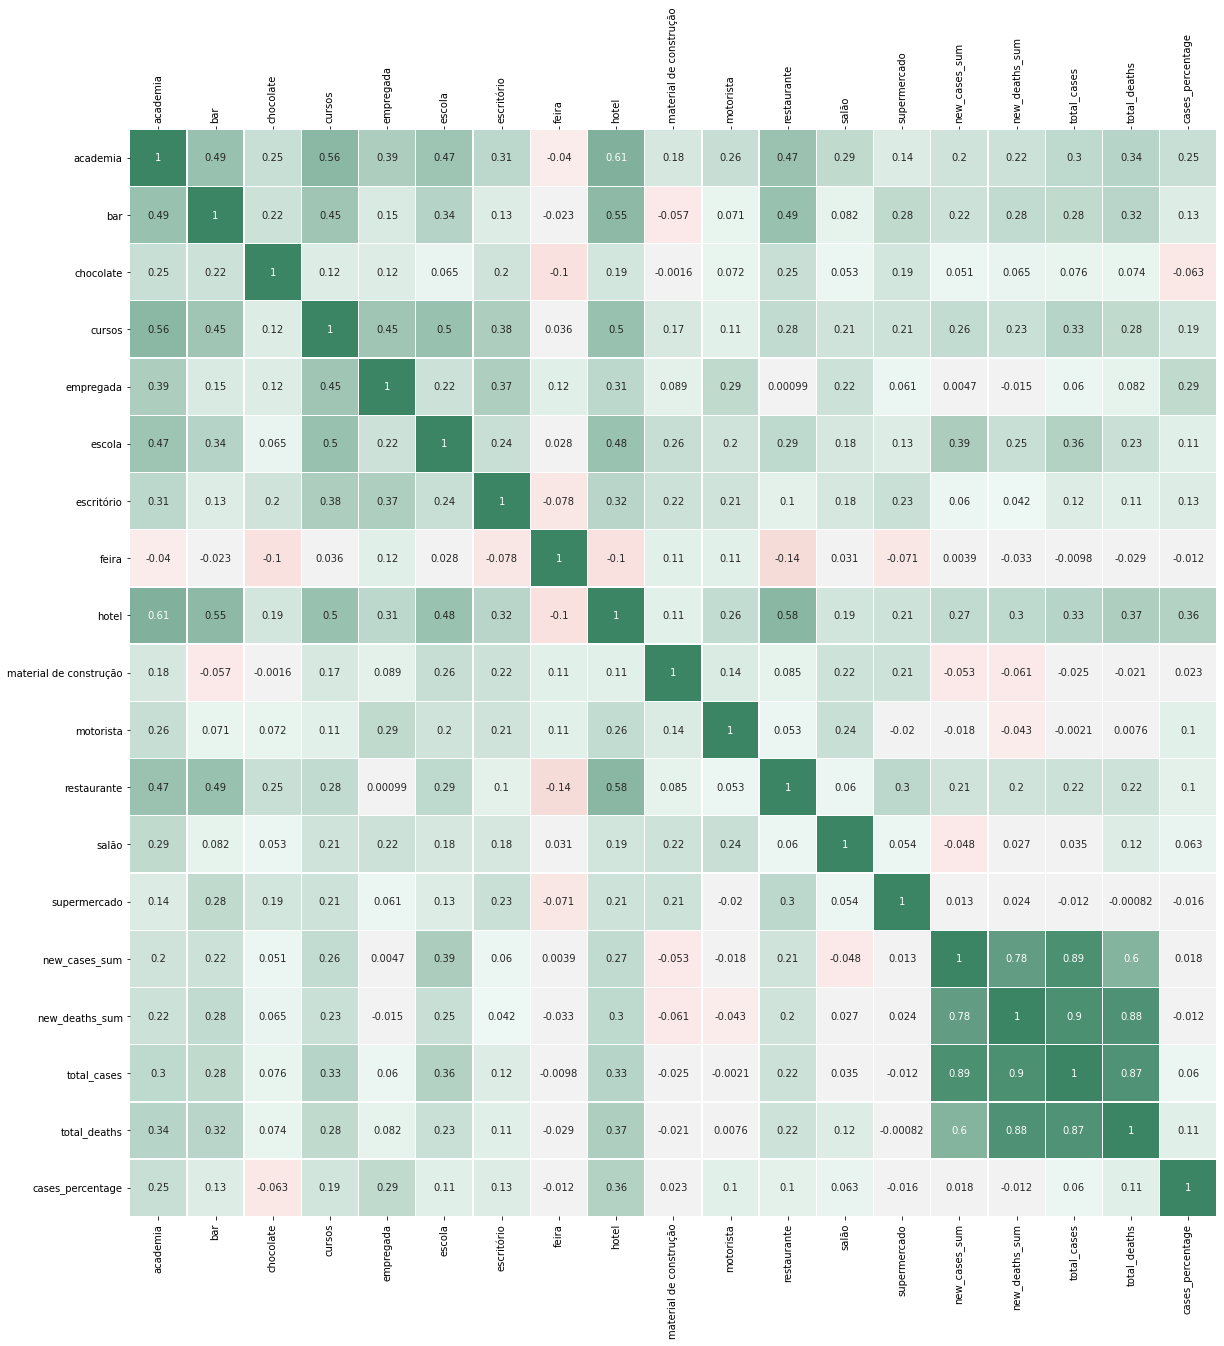

In [34]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(aux_df_trends.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(15, 150, center='light', n=200), square=True, yticklabels=1, annot=True, cbar=False, linewidths=.3, ax=ax)
ax.tick_params(top=True,labeltop=True)
plt.xticks(rotation='vertical')
plt.show()

---

In [35]:
with pd.option_context('display.max_columns', None):
    display(aux_df_trends.loc[(slice(None),['Natal']),:])

,,academia,bar,chocolate,cursos,empregada,escola,escritório,feira,hotel,material de construção,motorista,restaurante,salão,supermercado,_start_day,_end_day,new_cases_sum,new_deaths_sum,health_region_code,population,total_cases,total_deaths,cases_percentage
Date,City,,,,,,,,,,,,,,,,,,,,,,,
08-14,Natal,0.123596,0.098901,0.265823,0.176471,0.010101,0.298701,0.052632,0.086957,0.204819,0.052632,0.020408,0.111111,0.010101,0.111111,08,14,1728.0,65.0,7ª REGIAO DE SAUDE - METROPOLITANA,884122,15392.0,609.0,0.017409
15-21,Natal,0.162791,0.086957,0.250000,0.204819,0.052632,0.265823,0.020408,0.063830,0.265823,0.075269,0.052632,0.219512,0.020408,0.123596,15,21,1617.0,77.0,7ª REGIAO DE SAUDE - METROPOLITANA,884122,17009.0,686.0,0.019238
22-28,Natal,0.250000,0.149425,0.250000,0.265823,0.063830,0.333333,0.075269,0.098901,0.388889,0.075269,0.123596,0.250000,0.063830,0.162791,22,28,1374.0,43.0,7ª REGIAO DE SAUDE - METROPOLITANA,884122,18383.0,729.0,0.020792


In [36]:
with pd.option_context('display.max_columns', None):
    display(aux_df_trends.loc[(slice(None),['Fortaleza']),:])

,,academia,bar,chocolate,cursos,empregada,escola,escritório,feira,hotel,material de construção,motorista,restaurante,salão,supermercado,_start_day,_end_day,new_cases_sum,new_deaths_sum,health_region_code,population,total_cases,total_deaths,cases_percentage
Date,City,,,,,,,,,,,,,,,,,,,,,,,
08-14,Fortaleza,0.123596,0.086957,0.190476,0.204819,0.030928,0.333333,0.041667,0.111111,0.250000,0.020408,0.052632,0.162791,0.041667,0.219512,08,14,1110.0,140.0,1ª REGIAO FORTALEZA,2669342,38368.0,3536.0,0.014374
15-21,Fortaleza,0.162791,0.123596,0.234568,0.204819,0.041667,0.408451,0.041667,0.149425,0.298701,0.041667,0.041667,0.190476,0.052632,0.176471,15,21,1651.0,84.0,1ª REGIAO FORTALEZA,2669342,40019.0,3620.0,0.014992
22-28,Fortaleza,0.333333,0.136364,0.265823,0.204819,0.030928,0.408451,0.063830,0.162791,0.388889,0.010101,0.063830,0.204819,0.052632,0.234568,22,28,1501.0,69.0,1ª REGIAO FORTALEZA,2669342,41520.0,3689.0,0.015554


In [37]:
with pd.option_context('display.max_columns', None):
    display(aux_df_trends.loc[(slice(None),['São Paulo']),:])

,,academia,bar,chocolate,cursos,empregada,escola,escritório,feira,hotel,material de construção,motorista,restaurante,salão,supermercado,_start_day,_end_day,new_cases_sum,new_deaths_sum,health_region_code,population,total_cases,total_deaths,cases_percentage
Date,City,,,,,,,,,,,,,,,,,,,,,,,
08-14,São Paulo,0.136364,0.098901,0.190476,0.162791,0.010101,0.250000,0.030928,0.086957,0.190476,0.020408,0.020408,0.176471,0.020408,0.111111,08,14,16300.0,593.0,SAO PAULO,12252023,158802.0,8336.0,0.012961
15-21,São Paulo,0.149425,0.111111,0.219512,0.162791,0.010101,0.265823,0.030928,0.086957,0.190476,0.020408,0.030928,0.190476,0.020408,0.111111,15,21,8999.0,584.0,SAO PAULO,12252023,167801.0,8920.0,0.013696
22-28,São Paulo,0.123596,0.123596,0.204819,0.136364,0.010101,0.282051,0.030928,0.098901,0.234568,0.020408,0.030928,0.234568,0.020408,0.098901,22,28,14226.0,321.0,SAO PAULO,12252023,182027.0,9241.0,0.014857


In [38]:
with pd.option_context('display.max_columns', None):
    display(aux_df_trends.loc[(slice(None),['Uberlândia']),:])

,,academia,bar,chocolate,cursos,empregada,escola,escritório,feira,hotel,material de construção,motorista,restaurante,salão,supermercado,_start_day,_end_day,new_cases_sum,new_deaths_sum,health_region_code,population,total_cases,total_deaths,cases_percentage
Date,City,,,,,,,,,,,,,,,,,,,,,,,
08-14,Uberlândia,0.063830,0.098901,0.176471,0.123596,0.010101,0.298701,0.030928,0.075269,0.204819,0.041667,0.020408,0.123596,0.020408,0.250000,08,14,1587.0,23.0,UBERLANDIA / ARAGUARI,691305,9446.0,145.0,0.013664
15-21,Uberlândia,0.086957,0.098901,0.234568,0.136364,0.010101,0.333333,0.020408,0.086957,0.176471,0.030928,0.041667,0.162791,0.020408,0.162791,15,21,1138.0,24.0,UBERLANDIA / ARAGUARI,691305,10584.0,169.0,0.015310
22-28,Uberlândia,0.086957,0.176471,0.136364,0.162791,0.020408,0.470588,0.041667,0.086957,0.298701,0.063830,0.041667,0.219512,0.030928,0.204819,22,28,1650.0,29.0,UBERLANDIA / ARAGUARI,691305,12234.0,198.0,0.017697


In [39]:
with pd.option_context('display.max_columns', None):
    display(aux_df_trends.loc[(slice(None),['Contagem']),:])

,,academia,bar,chocolate,cursos,empregada,escola,escritório,feira,hotel,material de construção,motorista,restaurante,salão,supermercado,_start_day,_end_day,new_cases_sum,new_deaths_sum,health_region_code,population,total_cases,total_deaths,cases_percentage
Date,City,,,,,,,,,,,,,,,,,,,,,,,
08-14,Contagem,0.075269,0.075269,0.123596,0.111111,0.010000,0.265823,0.052632,0.052632,0.176471,0.020408,0.030928,0.111111,0.020408,0.204819,08,14,848.0,25.0,CONTAGEM,663855,1947.0,83.0,0.002933
15-21,Contagem,0.075269,0.030928,0.111111,0.086957,0.010101,0.234568,0.030928,0.063830,0.176471,0.010000,0.030928,0.123596,0.010101,0.204819,15,21,345.0,16.0,CONTAGEM,663855,2292.0,99.0,0.003453
22-28,Contagem,0.075269,0.075269,0.149425,0.098901,0.010000,0.282051,0.020408,0.075269,0.162791,0.010101,0.041667,0.111111,0.020408,0.162791,22,28,590.0,27.0,CONTAGEM,663855,2882.0,126.0,0.004341


In [40]:
with pd.option_context('display.max_columns', None):
    display(aux_df_trends.loc[(slice(None),['Manaus']),:])

,,academia,bar,chocolate,cursos,empregada,escola,escritório,feira,hotel,material de construção,motorista,restaurante,salão,supermercado,_start_day,_end_day,new_cases_sum,new_deaths_sum,health_region_code,population,total_cases,total_deaths,cases_percentage
Date,City,,,,,,,,,,,,,,,,,,,,,,,
08-14,Manaus,0.136364,0.098901,0.265823,0.298701,0.052632,0.428571,0.075269,0.086957,0.298701,0.136364,0.041667,0.123596,0.041667,0.149425,08,14,1897.0,61.0,"MANAUS, ENTORNO E ALTO RIO NEGRO",2182763,31053.0,1914.0,0.014226
15-21,Manaus,0.234568,0.149425,0.204819,0.369863,0.030928,0.515152,0.063830,0.111111,0.282051,0.149425,0.052632,0.149425,0.052632,0.162791,15,21,1390.0,50.0,"MANAUS, ENTORNO E ALTO RIO NEGRO",2182763,32443.0,1964.0,0.014863
22-28,Manaus,0.282051,0.098901,0.176471,0.428571,0.030928,0.515152,0.063830,0.176471,0.408451,0.149425,0.063830,0.219512,0.030928,0.204819,22,28,2008.0,31.0,"MANAUS, ENTORNO E ALTO RIO NEGRO",2182763,34451.0,1995.0,0.015783


In [41]:
aux_df_trends.loc[(slice(None),['Natal']),['motorista','hotel', 'population','total_cases', 'cases_percentage']]

,,motorista,hotel,population,total_cases,cases_percentage
Date,City,,,,,
08-14,Natal,0.020408,0.204819,884122,15392.0,0.017409
15-21,Natal,0.052632,0.265823,884122,17009.0,0.019238
22-28,Natal,0.123596,0.388889,884122,18383.0,0.020792


In [42]:
aux_df_trends.loc[(slice(None),['Fortaleza']),['motorista','hotel', 'population', 'total_cases', 'cases_percentage']]

,,motorista,hotel,population,total_cases,cases_percentage
Date,City,,,,,
08-14,Fortaleza,0.052632,0.250000,2669342,38368.0,0.014374
15-21,Fortaleza,0.041667,0.298701,2669342,40019.0,0.014992
22-28,Fortaleza,0.063830,0.388889,2669342,41520.0,0.015554


In [43]:
aux_df_trends.loc[(slice(None),['Brasília']),['motorista','hotel','population', 'total_cases', 'cases_percentage']]

,,motorista,hotel,population,total_cases,cases_percentage
Date,City,,,,,
08-14,Brasília,0.041667,0.298701,3015268,73654.0,0.024427
15-21,Brasília,0.030928,0.315789,3015268,86076.0,0.028547
22-28,Brasília,0.052632,0.351351,3015268,100726.0,0.033405


In [44]:
aux_df_trends.loc[(slice(None),['São Paulo']),['motorista','hotel', 'population', 'total_cases', 'cases_percentage']]

,,motorista,hotel,population,total_cases,cases_percentage
Date,City,,,,,
08-14,São Paulo,0.020408,0.190476,12252023,158802.0,0.012961
15-21,São Paulo,0.030928,0.190476,12252023,167801.0,0.013696
22-28,São Paulo,0.030928,0.234568,12252023,182027.0,0.014857


In [45]:
aux_df_trends.loc[(slice(None),['Rio de Janeiro']),['motorista','population', 'total_cases', 'cases_percentage']]

,,motorista,population,total_cases,cases_percentage
Date,City,,,,
08-14,Rio de Janeiro,0.030928,6718903,65121.0,0.009692
15-21,Rio de Janeiro,0.041667,6718903,67121.0,0.009990
22-28,Rio de Janeiro,0.041667,6718903,70440.0,0.010484


In [46]:
aux_df_trends.loc[(slice(None),['Uberlândia']),['motorista', 'total_cases', 'cases_percentage']]

,,motorista,total_cases,cases_percentage
Date,City,,,
08-14,Uberlândia,0.020408,9446.0,0.013664
15-21,Uberlândia,0.041667,10584.0,0.015310
22-28,Uberlândia,0.041667,12234.0,0.017697


In [47]:
aux_df_trends.loc[(slice(None),['Contagem']),['motorista', 'total_cases', 'cases_percentage']]

,,motorista,total_cases,cases_percentage
Date,City,,,
08-14,Contagem,0.030928,1947.0,0.002933
15-21,Contagem,0.030928,2292.0,0.003453
22-28,Contagem,0.041667,2882.0,0.004341


---